# Obteniendo información

In [27]:
import numpy as np
import pandas as pd
import os
import nltk


tweets_training = pd.read_csv('twitter_training.csv')

tweets_validation = pd.read_csv('twitter_validation.csv')

In [28]:
tweets_training.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [29]:
tweets_validation.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [30]:
tweets_training.columns = ['Id', 'Category', 'Sentiment', 'Text']
tweets_validation.columns = tweets_training.columns

In [31]:
tweets_training['Category'].value_counts()

Category
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)      

In [32]:
tweets_training['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [33]:
tweets_training.isnull().sum()

Id             0
Category       0
Sentiment      0
Text         686
dtype: int64

In [34]:
tweets_training.dropna(subset=['Text'], inplace=True)

In [35]:
tweets_training['Sentiment'] = tweets_training['Sentiment'].replace('Irrelevant', 'Neutral')
tweets_validation['Sentiment'] = tweets_validation['Sentiment'].replace('Irrelevant', 'Neutral')

# Análisis de datos

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
sentiment_counts = tweets_training['Sentiment'].value_counts()

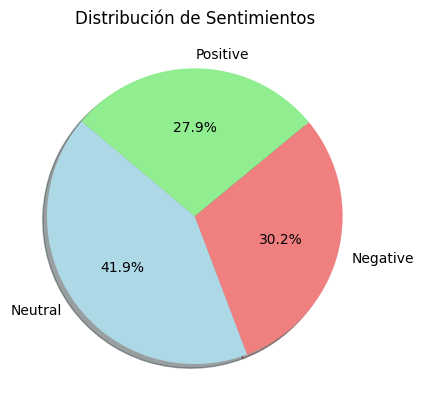

In [38]:
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['lightblue', 'lightcoral', 'lightgreen']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribución de Sentimientos')
plt.show()

# Preprocesamiento de Datos

In [39]:
import spacy
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [ ]:
tweets_training['Preprocessed Text'] = tweets_training['Text'].apply(preprocess)

In [ ]:
tweets_training

,Id,Category,Sentiment,Text,Preprocessed Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realize Windows partition Mac like 6 year Nvid...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realize Mac window partition 6 year Nvidia dri...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realize window partition Mac 6 year Nvidia dri...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realize window partition Mac like 6 year Nvidi...


In [ ]:
from sklearn.preprocessing import LabelEncoder

labenc = LabelEncoder()
tweets_training['Sentiment'] = labenc.fit_transform(tweets_training['Sentiment'])

In [ ]:
tweets_training.head()

,Id,Category,Sentiment,Text,Preprocessed Text
0,2401,Borderlands,2,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,2,im getting on borderlands and i will kill you ...,m get borderland kill
2,2401,Borderlands,2,im coming on borderlands and i will murder you...,m come borderland murder
3,2401,Borderlands,2,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
4,2401,Borderlands,2,im getting into borderlands and i can murder y...,m get borderland murder


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets_training['Preprocessed Text'], tweets_training['Sentiment'],
                                                    test_size=0.2, random_state=42, stratify=tweets_training['Sentiment'])

# Naive Bayes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

multinomialnb = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('naive_bayes', (MultinomialNB()))
])

In [ ]:
multinomialnb.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [ ]:
y_pred = multinomialnb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, y_pred))

0.7911345361173052


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      4472
           1       0.76      0.87      0.81      6196
           2       0.84      0.69      0.76      4131

    accuracy                           0.79     14799
   macro avg       0.80      0.78      0.79     14799
weighted avg       0.80      0.79      0.79     14799



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('random_forest', (RandomForestClassifier(n_estimators=100, random_state=42)))
])


In [ ]:
randomforest.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('random_forest', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = randomforest.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9207378876951146


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4472
           1       0.90      0.95      0.92      6196
           2       0.93      0.89      0.91      4131

    accuracy                           0.92     14799
   macro avg       0.93      0.92      0.92     14799
weighted avg       0.92      0.92      0.92     14799



# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('svc', (SVC()))
])

In [ ]:
svc.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('naive_bayes', SVC())])

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.931008851949456
